Importing dependencies

In [1]:
import numpy as np
import pandas as pd

In [2]:
#load data set
df_insurance=pd.read_csv(r"C:\Users\Pitchamani\Desktop\Insurance_cost_prediction\env\Scripts\cost_prediction\medical_insurance.csv")

cleaning Data

In [3]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [5]:
df_insurance.shape

(2772, 7)

In [6]:
#Duplicate values
df_insurance.duplicated().sum()

np.int64(1435)

In [7]:
df_insurance.drop_duplicates(inplace=True)

In [8]:
df_insurance.shape


(1337, 7)

In [9]:
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df_insurance.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
df_insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
# to check unrealstic
df_insurance[df_insurance['age'] < 0]

,age,sex,bmi,children,smoker,region,charges


In [18]:
# Unrealistic BMI
df_insurance[df_insurance['bmi'] < 18]  # very underweight



,age,sex,bmi,children,smoker,region,charges
28,23,male,17.385,1,no,northwest,2775.19215
128,32,female,17.765,2,yes,northwest,32734.18630
172,18,male,15.960,0,no,northeast,1694.79640
232,19,female,17.800,0,no,southwest,1727.78500
250,18,male,17.290,2,yes,northeast,12829.45510
380,27,female,17.955,2,yes,northeast,15006.57945
410,19,male,17.480,0,no,northwest,1621.34020
412,26,female,17.195,2,yes,northeast,14455.64405
428,21,female,16.815,1,no,northeast,3167.45585
680,21,female,17.400,1,no,southwest,2585.26900


In [19]:
df_insurance[df_insurance['bmi'] > 60]  # extremely high


,age,sex,bmi,children,smoker,region,charges


In [20]:
# Charges must be >= 0
df_insurance[df_insurance['charges'] < 0]

,age,sex,bmi,children,smoker,region,charges


In [21]:
# Check unique values for typos
print(df_insurance['sex'].unique())
print(df_insurance['smoker'].unique())
print(df_insurance['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

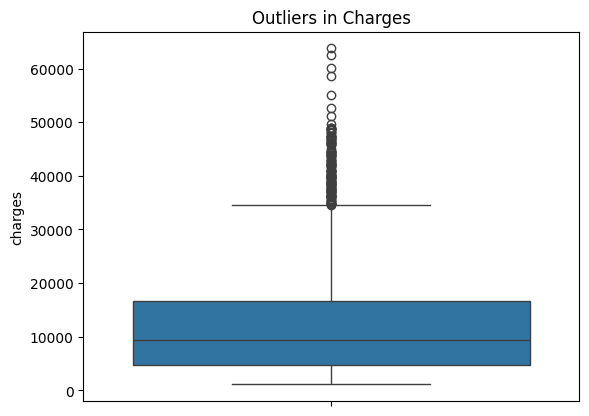

In [23]:
sns.boxplot(y=df_insurance['charges'])
plt.title("Outliers in Charges")
plt.show()

In [24]:
df_insurance[df_insurance['charges'] > 50000].sort_values(by='charges', ascending=False)

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
34,28,male,36.400,1,yes,southwest,51194.55914


I am keeping the outlier since the values are realistics

Encodig the categorical values(Gender, Smoker,Region)

In [25]:
#Encoding the categorical features
df_insurance.replace({"sex":{"male":0,"female":1}},inplace=True)
df_insurance.replace({"smoker":{"yes":0,"no":1}},inplace=True)
df_insurance.replace({"region":{"southeast":0,"southwest":1,"northwest":2,"northeast":3}},inplace=True)

C:\Users\Pitchamani\AppData\Local\Temp\ipykernel_19692\2271353457.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_insurance.replace({"sex":{"male":0,"female":1}},inplace=True)
C:\Users\Pitchamani\AppData\Local\Temp\ipykernel_19692\2271353457.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_insurance.replace({"smoker":{"yes":0,"no":1}},inplace=True)
C:\Users\Pitchamani\AppData\Local\Temp\ipykernel_19692\2271353457.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future versi

In [26]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


Perform Feature Engineering

In [27]:
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df_insurance['bmi_category'] = df_insurance['bmi'].apply(classify_bmi)


In [28]:
df_insurance.replace({"bmi_category":{"Underweight":0,"Normal":1,"Overweight":2,"Obese":3}},inplace=True)

C:\Users\Pitchamani\AppData\Local\Temp\ipykernel_19692\898335002.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_insurance.replace({"bmi_category":{"Underweight":0,"Normal":1,"Overweight":2,"Obese":3}},inplace=True)


In [29]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,1,27.900,0,0,1,16884.92400,2
1,18,0,33.770,1,1,0,1725.55230,3
2,28,0,33.000,3,1,0,4449.46200,3
3,33,0,22.705,0,1,2,21984.47061,1
4,32,0,28.880,0,1,2,3866.85520,2


C:\Users\Pitchamani\AppData\Local\Temp\ipykernel_19692\3815299547.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_insurance, x='bmi_category', y='charges', estimator='mean', ci='sd', palette='Set2')
C:\Users\Pitchamani\AppData\Local\Temp\ipykernel_19692\3815299547.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_insurance, x='bmi_category', y='charges', estimator='mean', ci='sd', palette='Set2')


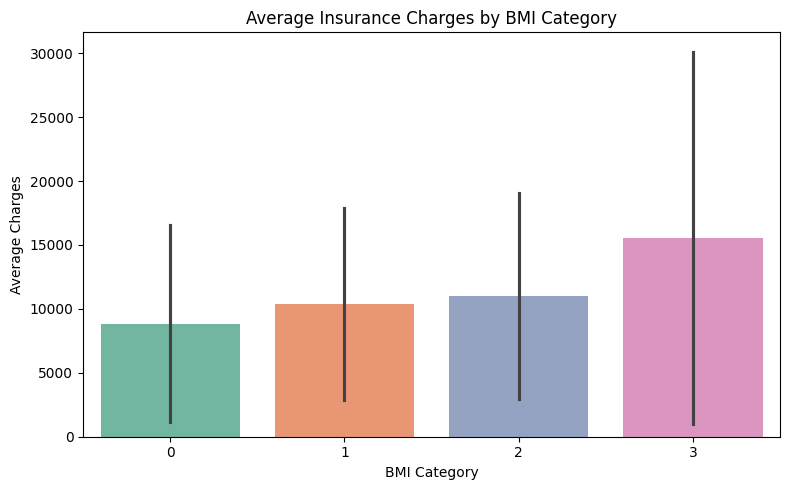

In [30]:
# Step 2: Plot Average Charges by BMI Category
plt.figure(figsize=(8, 5))
sns.barplot(data=df_insurance, x='bmi_category', y='charges', estimator='mean', ci='sd', palette='Set2')
plt.title('Average Insurance Charges by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Average Charges')
plt.tight_layout()
plt.show()

Step 2: Medical Insurance Cost Prediction


*  Perform Exploratory Data Analysis (EDA) to identify key factors influencing insurance charges.

*   Train at least 5 regression models including Linear Regression, Random Forest, and XGBoost

*   Evaluate model performance using metrics such as RMSE, MAE, and R-squared.

In [31]:
#EDA


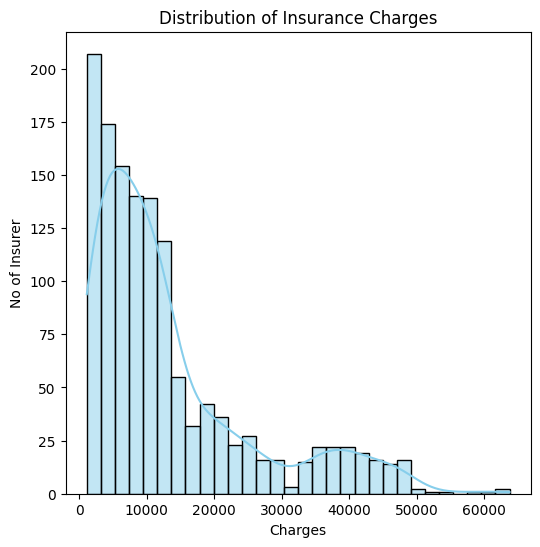

In [32]:
#What is the distribution of medical insurance charges?
#Histogram
plt.figure(figsize=(6, 6))
sns.histplot(df_insurance['charges'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('No of Insurer')
plt.show()


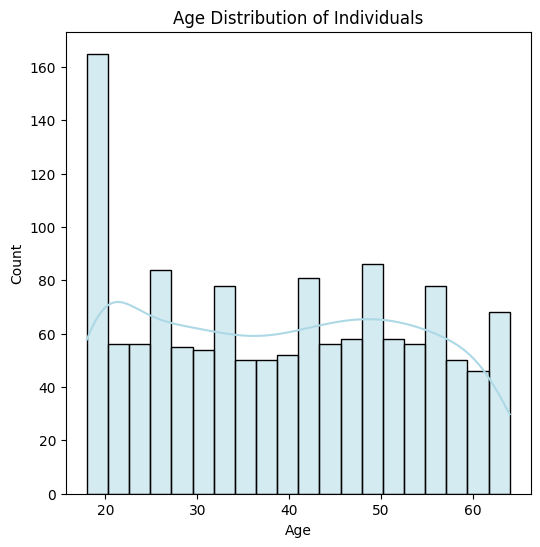

In [33]:
#What is the age distribution of the individuals?
plt.figure(figsize=(6,6))
sns.histplot(df_insurance['age'], bins=20, kde=True, color='lightblue')
plt.title('Age Distribution of Individuals')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

C:\Users\Pitchamani\AppData\Local\Temp\ipykernel_19692\1638520062.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sc=sns.countplot(data=df_insurance, x='smoker', palette='Set2')


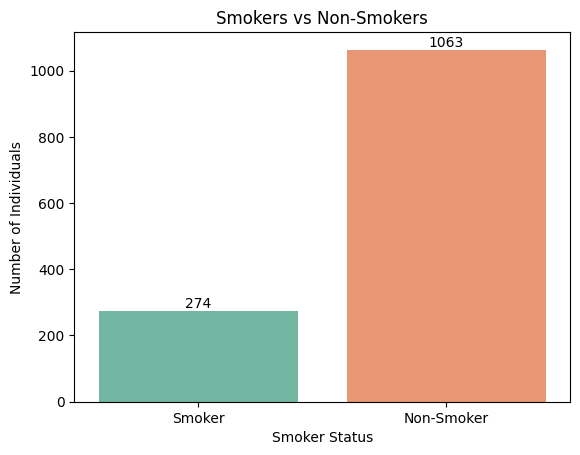

In [34]:
#How many people are smokers vs non-smokers
sc=sns.countplot(data=df_insurance, x='smoker', palette='Set2')
plt.title('Smokers vs Non-Smokers')
plt.xlabel('Smoker Status')
plt.ylabel('Number of Individuals')
plt.xticks([0, 1], ['Smoker', 'Non-Smoker'])

# Add value labels on top of each bar
for container in sc.containers:
    sc.bar_label(container)
plt.show()

In [35]:
#What is the average BMI in the dataset?
average_bmi = df_insurance['bmi'].mean()
print("The Avg BMI is:",average_bmi)

The Avg BMI is: 30.66345175766642


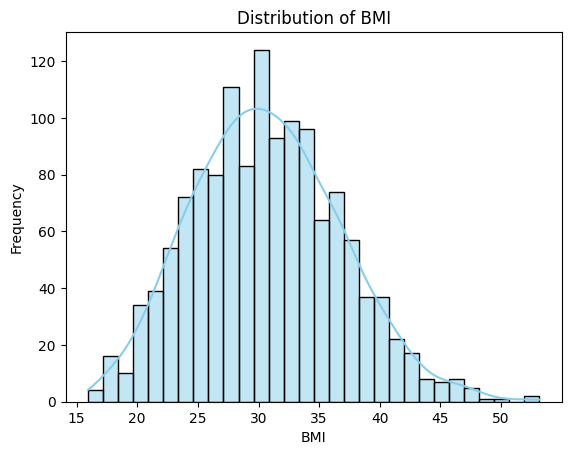

In [36]:
sns.histplot(df_insurance['bmi'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

C:\Users\Pitchamani\AppData\Local\Temp\ipykernel_19692\1109048680.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df_insurance, x='region', palette='Set2')


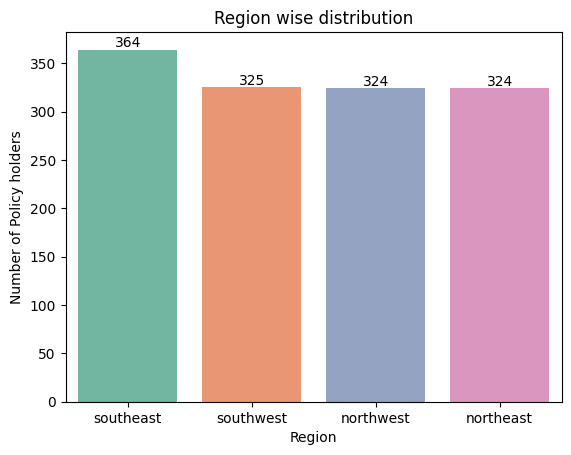

In [37]:
#Which regions have the most number of policyholders?
ax=sns.countplot(data=df_insurance, x='region', palette='Set2')
plt.title('Region wise distribution')
plt.xlabel('Region')
plt.ylabel('Number of Policy holders')
plt.xticks([0,1,2,3], ["southeast","southwest","northwest","northeast"])

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container)

plt.show()


2. Bivariate Analysis (Two Variables):

C:\Users\Pitchamani\AppData\Local\Temp\ipykernel_19692\1616276106.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_insurance, x='age', y='charges',palette='Set1', alpha=0.6)


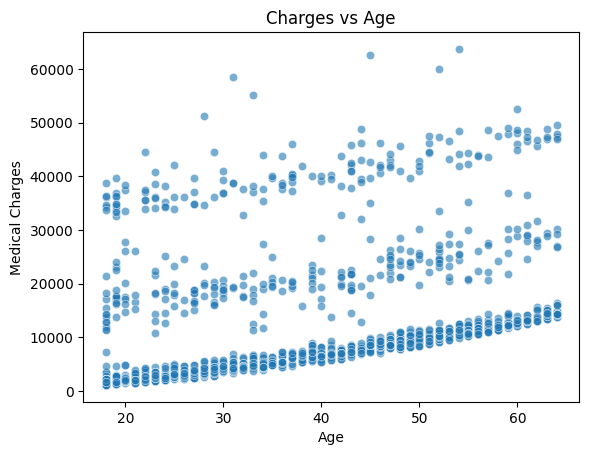

In [38]:
#How do charges vary with age?
sns.scatterplot(data=df_insurance, x='age', y='charges',palette='Set1', alpha=0.6)
plt.title('Charges vs Age')
plt.xlabel('Age')
plt.ylabel('Medical Charges')
plt.show()

In [39]:
#Is there a difference in average charges between smokers and non-smokers?

In [40]:
df_insurance['smoker_status'] = df_insurance['smoker'].map({0: 'Smoker', 1: 'Non-Smoker'})
df_insurance.groupby('smoker_status')['charges'].mean()


smoker_status
Non-Smoker     8440.660307
Smoker        32050.231832
Name: charges, dtype: float64

C:\Users\Pitchamani\AppData\Local\Temp\ipykernel_19692\821867134.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_insurance, x='smoker_status', y='charges', palette='Set2')


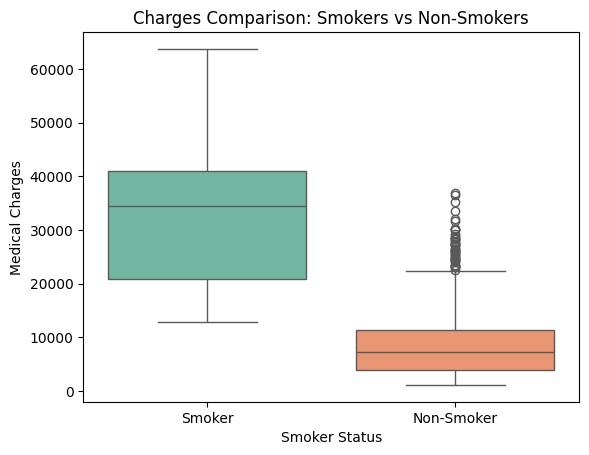

In [41]:
sns.boxplot(data=df_insurance, x='smoker_status', y='charges', palette='Set2')
plt.title('Charges Comparison: Smokers vs Non-Smokers')
plt.xlabel('Smoker Status')
plt.ylabel('Medical Charges')
plt.show()

 Interpretation: Smokers typically have much higher average and median charges compared to non-smokers, and there are often significant outliers among smokers.

C:\Users\Pitchamani\AppData\Local\Temp\ipykernel_19692\2222720252.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bc=sns.boxplot(data=df_insurance, x='bmi_category', y='charges', palette='Set3')


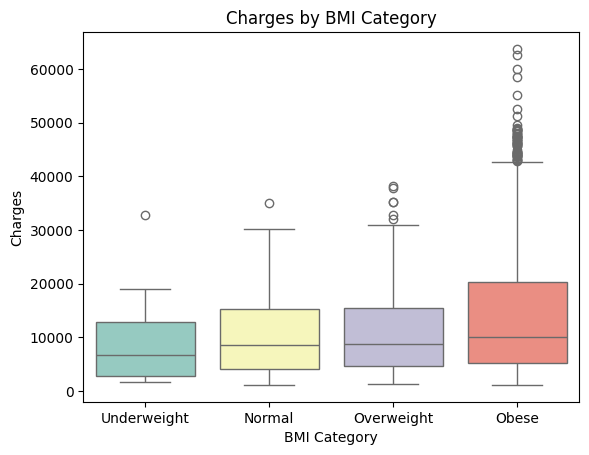

In [42]:
#Does BMI impact insurance charges?
bc=sns.boxplot(data=df_insurance, x='bmi_category', y='charges', palette='Set3')
plt.title('Charges by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Charges')
plt.xticks([0,1,2,3], ["Underweight","Normal","Overweight","Obese"])
plt.show()

In [43]:
#Do men or women pay more on average?

df_insurance.groupby('sex')['charges'].mean()

sex
0    13974.998864
1    12569.578844
Name: charges, dtype: float64

C:\Users\Pitchamani\AppData\Local\Temp\ipykernel_19692\273497784.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_insurance, x='sex', y='charges', palette='pastel')


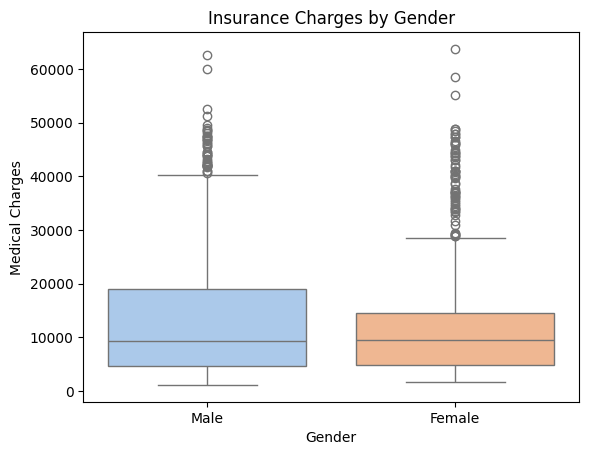

In [44]:
sns.boxplot(data=df_insurance, x='sex', y='charges', palette='pastel')
plt.title('Insurance Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Medical Charges')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

In [45]:
#Is there a correlation between the number of children and the insurance charges?
df_insurance.groupby('children')['charges'].mean()

children
0    12384.695344
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

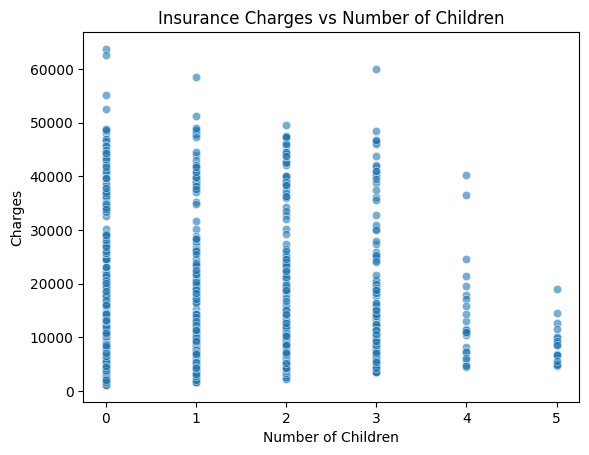

In [46]:
sns.scatterplot(data=df_insurance, x='children', y='charges', alpha=0.6)
plt.title('Insurance Charges vs Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

C:\Users\Pitchamani\AppData\Local\Temp\ipykernel_19692\2581423611.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_insurance, x='children', y='charges', palette='coolwarm')


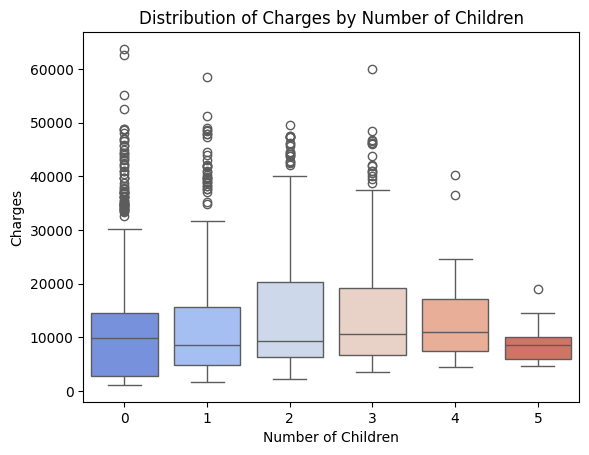

In [47]:
#Box plot
sns.boxplot(data=df_insurance, x='children', y='charges', palette='coolwarm')
plt.title('Distribution of Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

In [48]:
corr = df_insurance[['children', 'charges']].corr()
print(corr)


          children   charges
children  1.000000  0.067389
charges   0.067389  1.000000


Correlation values range from -1 to 1:

+1 means a strong positive linear relationship.

-1 means a strong negative linear relationship.

0 means no linear relationship.

✅ Interpretation:
0.067 is very close to 0, which means:

There is very little to no linear relationship between the number of children and insurance charges.

Having more children does not significantly impact how much an individual pays for insurance.

# **3. Multivariate Analysis (More than Two Variables):**

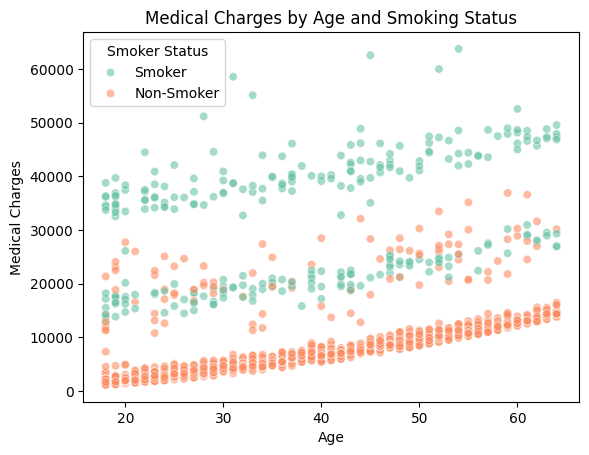

In [49]:
#How does smoking status combined with age affect medical charges?
sns.scatterplot(data=df_insurance, x='age', y='charges', hue='smoker_status', palette='Set2', alpha=0.6)
plt.title('Medical Charges by Age and Smoking Status')
plt.xlabel('Age')
plt.ylabel('Medical Charges')
plt.legend(title='Smoker Status') # Customize legend
plt.show()

In [50]:
#What is the impact of gender and region on charges for smokers?
df_smokers = df_insurance[df_insurance['smoker'] == 0]  # if 0 means smoker

C:\Users\Pitchamani\AppData\Local\Temp\ipykernel_19692\2340509578.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_smokers, x='sex', y='charges', palette='pastel')


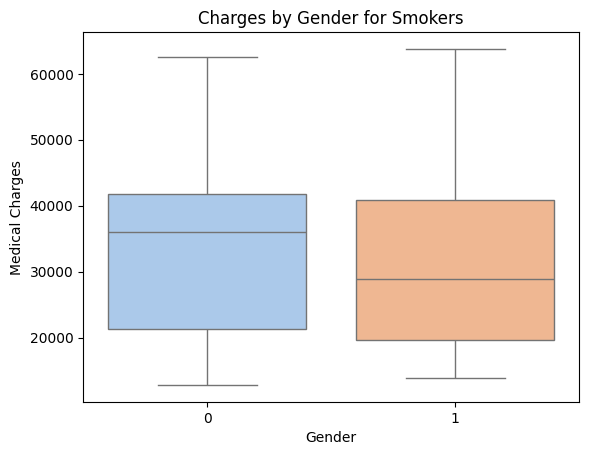

In [51]:
sns.boxplot(data=df_smokers, x='sex', y='charges', palette='pastel')
plt.title('Charges by Gender for Smokers')
plt.xlabel('Gender')
plt.ylabel('Medical Charges')
plt.show()


C:\Users\Pitchamani\AppData\Local\Temp\ipykernel_19692\2766683440.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_smokers, x='region', y='charges', palette='Set2')


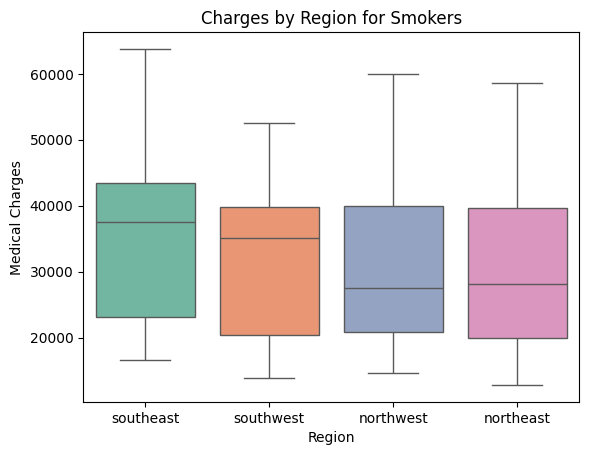

In [52]:
sns.boxplot(data=df_smokers, x='region', y='charges', palette='Set2')
plt.title('Charges by Region for Smokers')
plt.xlabel('Region')
plt.ylabel('Medical Charges')
plt.xticks([0,1,2,3], ["southeast","southwest","northwest","northeast"])
plt.show()


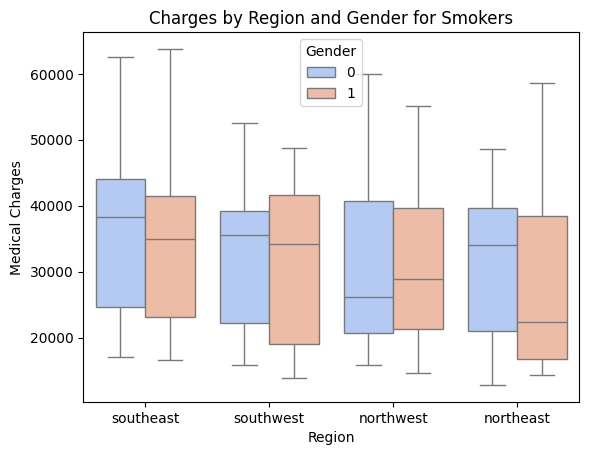

In [53]:
sns.boxplot(data=df_smokers, x='region', y='charges', hue='sex', palette='coolwarm')
plt.title('Charges by Region and Gender for Smokers')
plt.xlabel('Region')
plt.ylabel('Medical Charges')
plt.legend(title='Gender')
plt.xticks([0,1,2,3], ["southeast","southwest","northwest","northeast"])
plt.show()

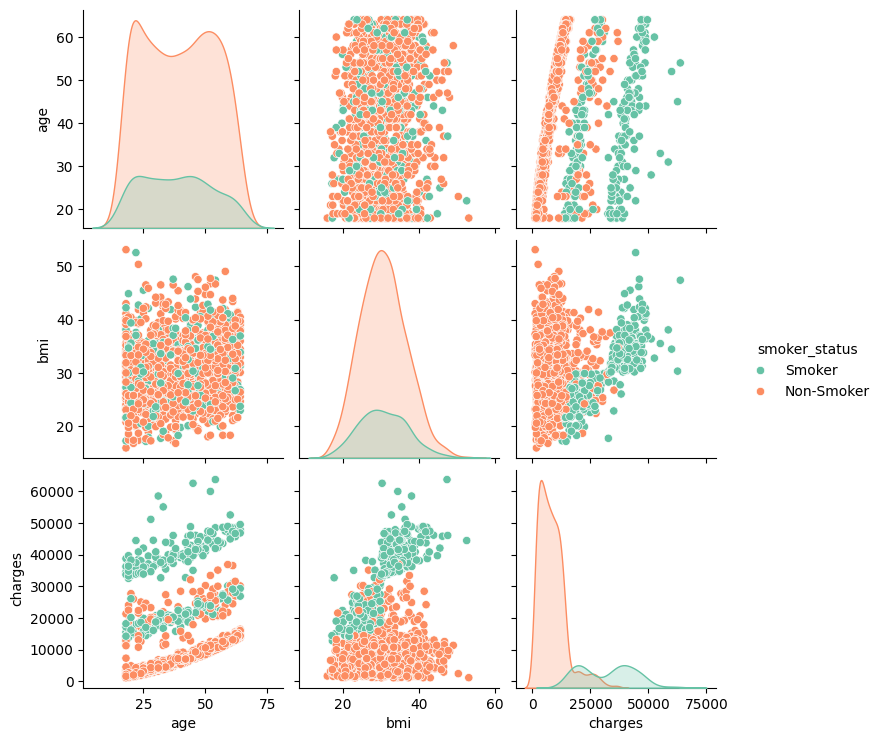

In [54]:
#How do age, BMI, and smoking status together affect insurance cost?
sns.pairplot(df_insurance, vars=['age', 'bmi', 'charges'], hue='smoker_status', palette='Set2')


In [55]:
#Do obese smokers (BMI > 30) pay significantly higher than non-obese non-smokers?

In [56]:
obese_smokers =df_insurance[(df_insurance['bmi'] > 30) & (df_insurance['smoker'] == 0)]
non_obese_non_smokers = df_insurance[(df_insurance['bmi'] <= 30) & (df_insurance['smoker'] == 1)]


In [57]:
print("Obese Smokers - Mean Charges:", obese_smokers['charges'].mean())
print("Non-Obese Non-Smokers - Mean Charges:", non_obese_non_smokers ['charges'].mean())


Obese Smokers - Mean Charges: 41692.80899152778
Non-Obese Non-Smokers - Mean Charges: 7966.944149520875


C:\Users\Pitchamani\AppData\Local\Temp\ipykernel_19692\4289931127.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_compare, x='group', y='charges', palette='Set2')


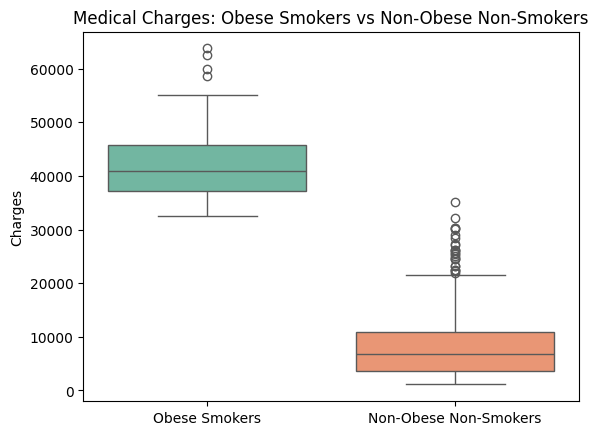

In [58]:
# Create a combined dataframe for visualization
df_compare = pd.concat([
    obese_smokers.assign(group='Obese Smokers'),
    non_obese_non_smokers.assign(group='Non-Obese Non-Smokers')
])

sns.boxplot(data=df_compare, x='group', y='charges', palette='Set2')
plt.title('Medical Charges: Obese Smokers vs Non-Obese Non-Smokers')
plt.ylabel('Charges')
plt.xlabel('')
plt.show()

In [59]:
#Are there outliers in the charges column? Who are the individuals paying the highest costs?#

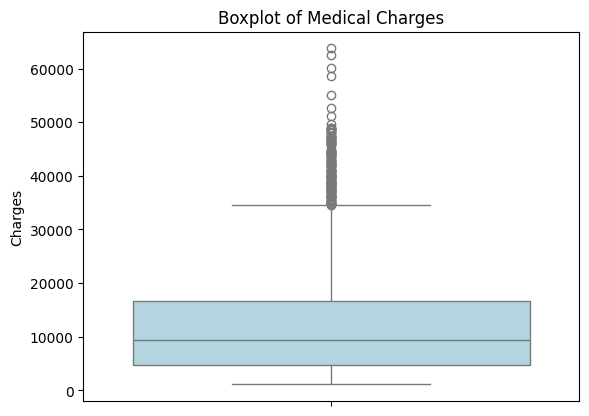

In [60]:
sns.boxplot(y=df_insurance['charges'], color='lightblue')
plt.title('Boxplot of Medical Charges')
plt.ylabel('Charges')
plt.show()

In [61]:
Q1 = df_insurance['charges'].quantile(0.25)
print("Q1:", Q1)
Q3 = df_insurance['charges'].quantile(0.75)
print("Q3:", Q1)
IQR = Q3 - Q1
print("IQR:", IQR)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

outliers = df_insurance[df_insurance['charges'] > upper_bound]
print(f"Number of outliers: {len(outliers)}")


Q1: 4746.344
Q3: 4746.344
IQR: 11911.37345
Lower Bound: -13120.716174999998
Upper Bound: 34524.777625
Number of outliers: 139


In [62]:
df_insurance.sort_values(by='charges', ascending=False).head(139)

,age,sex,bmi,children,smoker,region,charges,bmi_category,smoker_status
543,54,1,47.410,0,0,0,63770.42801,3,Smoker
1300,45,0,30.360,0,0,0,62592.87309,3,Smoker
1230,52,0,34.485,3,0,2,60021.39897,3,Smoker
577,31,1,38.095,1,0,3,58571.07448,3,Smoker
819,33,1,35.530,0,0,2,55135.40209,3,Smoker
...,...,...,...,...,...,...,...,...,...
1291,19,0,34.900,0,0,1,34828.65400,3,Smoker
689,27,0,31.130,1,0,0,34806.46770,3,Smoker
223,19,0,34.800,0,0,1,34779.61500,3,Smoker
1078,28,0,31.680,0,0,0,34672.14720,3,Smoker


C:\Users\Pitchamani\AppData\Local\Temp\ipykernel_19692\1017265126.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bmi_category', data=df_insurance, palette='Set2')


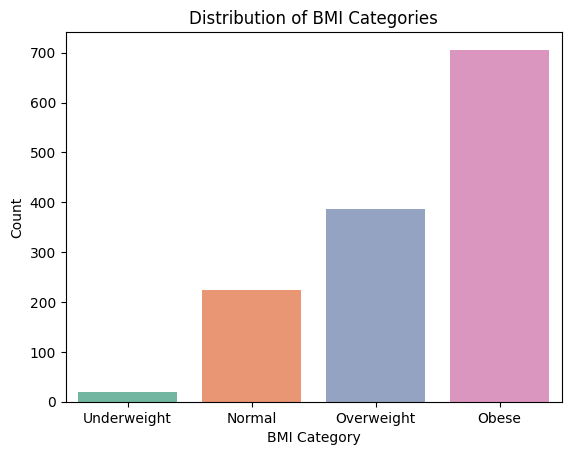

In [63]:
#Count Plot to See BMI Category Distribution
sns.countplot(x='bmi_category', data=df_insurance, palette='Set2')
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.xticks([0,1,2,3], ["Underweight","Normal","Overweight","Obese"])
plt.show()

Are there extreme BMI values that could skew predictions?

C:\Users\Pitchamani\AppData\Local\Temp\ipykernel_19692\3506907237.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_insurance, x='bmi_category', y='charges', palette='Set1')


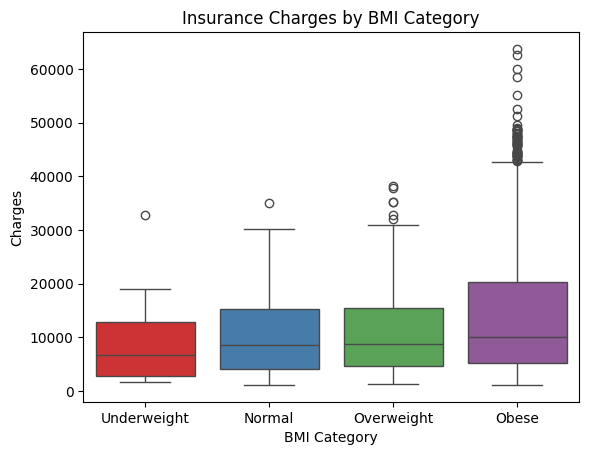

In [64]:
sns.boxplot(data=df_insurance, x='bmi_category', y='charges', palette='Set1')
plt.title('Insurance Charges by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Charges')
plt.xticks([0,1,2,3], ["Underweight","Normal","Overweight","Obese"])
plt.show()

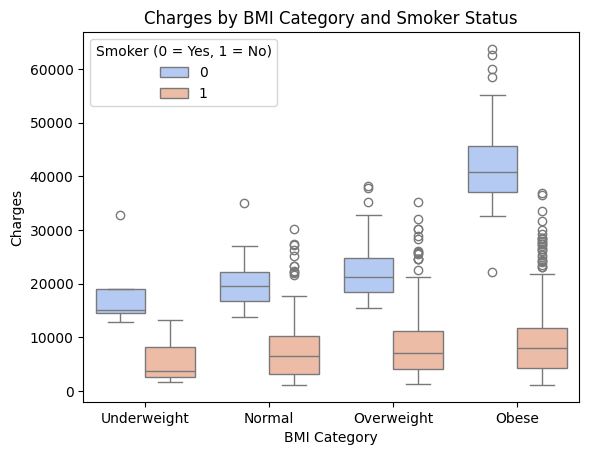

In [65]:
sns.boxplot(data=df_insurance, x='bmi_category', y='charges', hue='smoker', palette='coolwarm')
plt.title('Charges by BMI Category and Smoker Status')
plt.ylabel('Charges')
plt.xlabel('BMI Category')
plt.legend(title='Smoker (0 = Yes, 1 = No)')
plt.xticks([0,1,2,3], ["Underweight","Normal","Overweight","Obese"])
plt.show()


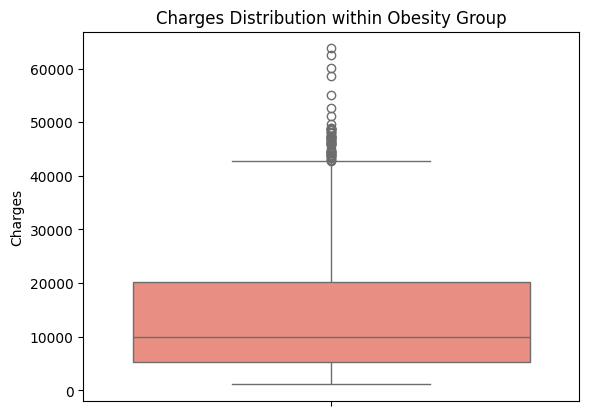

In [66]:
#Check for Outliers within Obesity Group
obese_group = df_insurance[df_insurance['bmi_category'] == 3]
sns.boxplot(y=obese_group['charges'], color='salmon')
plt.title('Charges Distribution within Obesity Group')
plt.ylabel('Charges')
plt.show()

# **5. Correlation Analysis:**

In [67]:
#Select Numeric Features#
numeric_cols = ['age', 'bmi', 'children', 'charges']
df_numeric = df_insurance[numeric_cols]


In [68]:
#Compute the Correlation Matrix
correlation_matrix = df_numeric.corr()
print(correlation_matrix)


               age       bmi  children   charges
age       1.000000  0.109344  0.041536  0.298308
bmi       0.109344  1.000000  0.012755  0.198401
children  0.041536  0.012755  1.000000  0.067389
charges   0.298308  0.198401  0.067389  1.000000


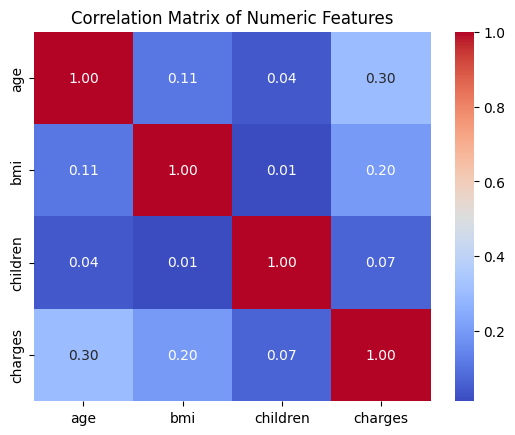

In [69]:
# Visualize Correlation Matrix with Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [70]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1337 non-null   int64  
 1   sex            1337 non-null   int64  
 2   bmi            1337 non-null   float64
 3   children       1337 non-null   int64  
 4   smoker         1337 non-null   int64  
 5   region         1337 non-null   int64  
 6   charges        1337 non-null   float64
 7   bmi_category   1337 non-null   int64  
 8   smoker_status  1337 non-null   object 
dtypes: float64(2), int64(6), object(1)
memory usage: 104.5+ KB


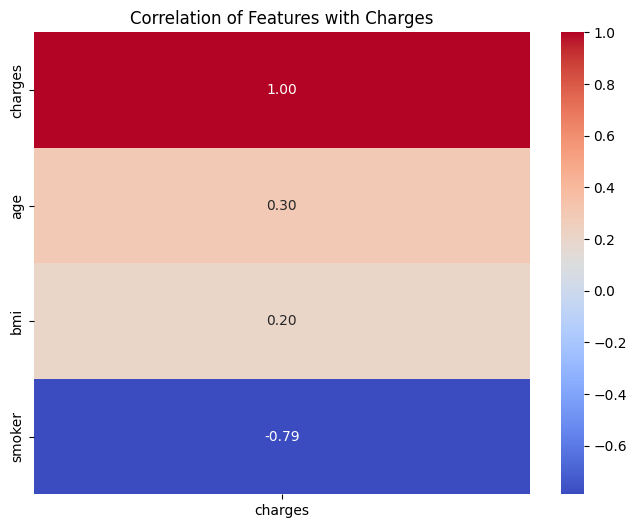

In [71]:
# Assuming your DataFrame is named 'df'
numerical_features = df_insurance[["age","bmi","smoker","charges"]]
correlation_matrix = numerical_features.corr()

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[['charges']].sort_values(by='charges', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Features with Charges")
plt.show()

In [72]:
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category,smoker_status
0,19,1,27.900,0,0,1,16884.92400,2,Smoker
1,18,0,33.770,1,1,0,1725.55230,3,Non-Smoker
2,28,0,33.000,3,1,0,4449.46200,3,Non-Smoker
3,33,0,22.705,0,1,2,21984.47061,1,Non-Smoker
4,32,0,28.880,0,1,2,3866.85520,2,Non-Smoker


In [73]:
df_model = df_insurance.drop(['smoker_status','bmi_category'], axis=1)

# Train at least 5 regression models including Linear Regression, Random Forest, and XGBoost.
Models to Train:

Linear Regression

Random Forest Regressor

XGBoost Regressor

Support Vector Regressor (SVR)

Gradient Boosting Regressor

In [74]:
#define X and y
X = df_model.drop('charges', axis=1)
y = df_model['charges']

In [75]:
## Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Standardize features (important for SVR)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
# Linear Regression
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)


In [78]:
#B. Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)


In [79]:
#C. XGBoost Regressor
from xgboost import XGBRegressor

model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)


In [80]:
#D. Support Vector Regressor (SVR)
from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(X_train_scaled, y_train)
y_pred_svr = model_svr.predict(X_test_scaled)


In [81]:
#E. Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

model_gbr = GradientBoostingRegressor(random_state=42)
model_gbr.fit(X_train, y_train)
y_pred_gbr = model_gbr.predict(X_test)


# 3. Evaluate Models

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(name, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{name}:\n"
          f" MAE:  {mae:.2f}\n"
          f" RMSE: {rmse:.2f}\n"
          f" R²:   {r2:.2f}\n")

In [84]:
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)
evaluate_model("SVR", y_test, y_pred_svr)
evaluate_model("Gradient Boosting", y_test, y_pred_gbr)


Linear Regression:
 MAE:  4175.85
 RMSE: 5956.94
 R²:   0.81

Random Forest:
 MAE:  2557.49
 RMSE: 4668.84
 R²:   0.88

XGBoost:
 MAE:  2901.83
 RMSE: 5063.32
 R²:   0.86

SVR:
 MAE:  9253.06
 RMSE: 14410.12
 R²:   -0.13

Gradient Boosting:
 MAE:  2508.80
 RMSE: 4249.85
 R²:   0.90



In [85]:
#summary
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'SVR', 'Gradient Boosting'],

    'MAE': [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_xgb),
        mean_absolute_error(y_test, y_pred_svr),
        mean_absolute_error(y_test, y_pred_gbr)
    ],

    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
        np.sqrt(mean_squared_error(y_test, y_pred_svr)),
        np.sqrt(mean_squared_error(y_test, y_pred_gbr))
    ],

    'R2 Score': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xgb),
        r2_score(y_test, y_pred_svr),
        r2_score(y_test, y_pred_gbr)
    ]
})

# Sort by R2 Score descending
print(results.sort_values(by='R2 Score', ascending=False))

               Model          MAE          RMSE  R2 Score
4  Gradient Boosting  2508.798833   4249.847184  0.901711
1      Random Forest  2557.487058   4668.838664  0.881375
2            XGBoost  2901.825568   5063.316173  0.860483
0  Linear Regression  4175.848519   5956.939372  0.806890
3                SVR  9253.061234  14410.121186 -0.130039


In [86]:
import mlflow

In [87]:
import mlflow.sklearn

In [88]:
mlflow.set_experiment("InsuranceCostPrediction")

<Experiment: artifact_location='file:///c:/Users/Pitchamani/Desktop/Insurance_cost_prediction/env/Scripts/cost_prediction/mlruns/379586195744936622', creation_time=1749412451678, experiment_id='379586195744936622', last_update_time=1749412451678, lifecycle_stage='active', name='InsuranceCostPrediction', tags={}>

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [90]:
# Define models with names
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "SVR": SVR(),
    "GradientBoosting": GradientBoostingRegressor()
}

In [91]:
# Set MLflow experiment (optional but recommended)
mlflow.set_experiment("InsuranceCostPrediction")

<Experiment: artifact_location='file:///c:/Users/Pitchamani/Desktop/Insurance_cost_prediction/env/Scripts/cost_prediction/mlruns/379586195744936622', creation_time=1749412451678, experiment_id='379586195744936622', last_update_time=1749412451678, lifecycle_stage='active', name='InsuranceCostPrediction', tags={}>

In [92]:
#Wrap Each Model in MLflow Logging Block
with mlflow.start_run(run_name="LinearRegression"):
    model_lr = LinearRegression()
    model_lr.fit(X_train_scaled, y_train)
    y_pred = model_lr.predict(X_test_scaled)

    # Log parameters (if any)
    mlflow.log_param("model_type", "LinearRegression")

    # Log metrics
    mlflow.log_metric("rmse", np.sqrt(mean_squared_error(y_test, y_pred)))
    mlflow.log_metric("mae", mean_absolute_error(y_test, y_pred))
    mlflow.log_metric("r2", r2_score(y_test, y_pred))

    # Log model
    mlflow.sklearn.log_model( model_lr, artifact_path="model", registered_model_name="LinearRegressionModel")


2025/06/10 22:48:54 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2025/06/10 22:49:04 WARNING mlflow.models.model: Model logged without a signature and input example. Ple

🏃 View run LinearRegression at: http://127.0.0.1:5000/#/experiments/379586195744936622/runs/2dd0ecb7ac564905ae6e9b24a14c15f7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/379586195744936622


Created version '2' of model 'LinearRegressionModel'.


In [93]:
with mlflow.start_run(run_name="RandomForestRegressor"):
    model_rf = RandomForestRegressor(random_state=42)
    model_rf.fit(X_train, y_train)
    y_pred = model_rf.predict(X_test)

    # Log parameters (if any)
    mlflow.log_param("model_type", "RandomForestRegressor")

    # Log metrics
    mlflow.log_metric("rmse", np.sqrt(mean_squared_error(y_test, y_pred)))
    mlflow.log_metric("mae", mean_absolute_error(y_test, y_pred))
    mlflow.log_metric("r2", r2_score(y_test, y_pred))

    # Log model
    mlflow.sklearn.log_model( model_rf, artifact_path="model", registered_model_name="RandomForestRegressor")

2025/06/10 22:49:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'RandomForestRegressor' already exists. Creating a new version of this model...
2025/06/10 22:49:15 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RandomForestRegressor, version 3


🏃 View run RandomForestRegressor at: http://127.0.0.1:5000/#/experiments/379586195744936622/runs/4486a08f78e447ecacef14a43e95964a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/379586195744936622


Created version '3' of model 'RandomForestRegressor'.


In [94]:
with mlflow.start_run(run_name="XGBRegressor"):
    model_xgb = XGBRegressor(random_state=42)
    model_xgb.fit(X_train, y_train)
    y_pred = model_xgb.predict(X_test)

    # Log parameters (if any)
    mlflow.log_param("model_type", "XGBRegressor")

    # Log metrics
    mlflow.log_metric("rmse", np.sqrt(mean_squared_error(y_test, y_pred)))
    mlflow.log_metric("mae", mean_absolute_error(y_test, y_pred))
    mlflow.log_metric("r2", r2_score(y_test, y_pred))

    # Log model
    mlflow.sklearn.log_model( model_xgb, artifact_path="model", registered_model_name="XGBRegressor")

2025/06/10 22:49:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'XGBRegressor' already exists. Creating a new version of this model...
2025/06/10 22:49:21 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBRegressor, version 2


🏃 View run XGBRegressor at: http://127.0.0.1:5000/#/experiments/379586195744936622/runs/3773a829ab044e2e9b466b58cdb9dea4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/379586195744936622


Created version '2' of model 'XGBRegressor'.


In [95]:
with mlflow.start_run(run_name="SVR"):
    model_svr = SVR()
    model_svr.fit(X_train_scaled, y_train)
    y_pred = model_svr.predict(X_test_scaled)

    # Log parameters (if any)
    mlflow.log_param("model_type", "SVR")

    # Log metrics
    mlflow.log_metric("rmse", np.sqrt(mean_squared_error(y_test, y_pred)))
    mlflow.log_metric("mae", mean_absolute_error(y_test, y_pred))
    mlflow.log_metric("r2", r2_score(y_test, y_pred))

    # Log model
    mlflow.sklearn.log_model( model_svr, artifact_path="model", registered_model_name="SVRModel")

2025/06/10 22:49:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'SVRModel' already exists. Creating a new version of this model...
2025/06/10 22:49:27 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: SVRModel, version 2
Created version '2' of model 'SVRModel'.


🏃 View run SVR at: http://127.0.0.1:5000/#/experiments/379586195744936622/runs/ae2268ca376f4ab2a31ef8fc1ab089ec
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/379586195744936622


In [96]:
with mlflow.start_run(run_name="GradientBoostingRegressor"):
    model_gbr = GradientBoostingRegressor(random_state=42)
    model_gbr.fit(X_train, y_train)
    y_pred = model_gbr.predict(X_test)

    # Log parameters (if any)
    mlflow.log_param("model_type", "GradientBoostingRegressor")

    # Log metrics
    mlflow.log_metric("rmse", np.sqrt(mean_squared_error(y_test, y_pred)))
    mlflow.log_metric("mae", mean_absolute_error(y_test, y_pred))
    mlflow.log_metric("r2", r2_score(y_test, y_pred))

    # Log model
    mlflow.sklearn.log_model( model_gbr, artifact_path="model", registered_model_name="GradientBoostingRegressorModel")

2025/06/10 22:49:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'GradientBoostingRegressorModel' already exists. Creating a new version of this model...
2025/06/10 22:49:35 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: GradientBoostingRegressorModel, version 3


🏃 View run GradientBoostingRegressor at: http://127.0.0.1:5000/#/experiments/379586195744936622/runs/1d33d642a2bd403690b88b8add94ba17
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/379586195744936622


Created version '3' of model 'GradientBoostingRegressorModel'.


#Expreiement2

In [97]:
# Linear Regression
from sklearn.linear_model import LinearRegression

model_lr2 = LinearRegression()
model_lr2.fit(X_train_scaled, y_train)
y_pred_lr2 = model_lr2.predict(X_test_scaled)


In [98]:
#B. Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

model_rf2 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model_rf2.fit(X_train, y_train)
y_pred_rf2 = model_rf2.predict(X_test)

In [99]:
#C. XGBoost Regressor
from xgboost import XGBRegressor

model_xgb2 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model_xgb2.fit(X_train, y_train)
y_pred_xgb2 = model_xgb2.predict(X_test)

In [100]:
#D. Support Vector Regressor (SVR)
from sklearn.svm import SVR

model_svr2 = SVR(kernel='rbf', C=100, gamma=0.1)
model_svr2.fit(X_train_scaled, y_train)
y_pred_svr2= model_svr2.predict(X_test_scaled)

In [101]:
#E. Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

model_gbr2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_gbr2.fit(X_train, y_train)
y_pred_gbr2 = model_gbr2.predict(X_test)

In [102]:
evaluate_model("Linear Regression", y_test, y_pred_lr2)
evaluate_model("Random Forest", y_test, y_pred_rf2)
evaluate_model("XGBoost", y_test, y_pred_xgb2)
evaluate_model("SVR", y_test, y_pred_svr2)
evaluate_model("Gradient Boosting", y_test, y_pred_gbr2)

Linear Regression:
 MAE:  4175.85
 RMSE: 5956.94
 R²:   0.81

Random Forest:
 MAE:  2535.88
 RMSE: 4604.32
 R²:   0.88

XGBoost:
 MAE:  2457.32
 RMSE: 4388.67
 R²:   0.90

SVR:
 MAE:  5818.15
 RMSE: 11359.83
 R²:   0.30

Gradient Boosting:
 MAE:  2508.80
 RMSE: 4249.85
 R²:   0.90



In [103]:

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'SVR', 'Gradient Boosting'],

    'MAE': [
        mean_absolute_error(y_test, y_pred_lr2),
        mean_absolute_error(y_test, y_pred_rf2),
        mean_absolute_error(y_test, y_pred_xgb2),
        mean_absolute_error(y_test, y_pred_svr2),
        mean_absolute_error(y_test, y_pred_gbr2)
    ],

    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_lr2)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf2)),
        np.sqrt(mean_squared_error(y_test, y_pred_xgb2)),
        np.sqrt(mean_squared_error(y_test, y_pred_svr2)),
        np.sqrt(mean_squared_error(y_test, y_pred_gbr2))
    ],

    'R2 Score': [
        r2_score(y_test, y_pred_lr2),
        r2_score(y_test, y_pred_rf2),
        r2_score(y_test, y_pred_xgb2),
        r2_score(y_test, y_pred_svr2),
        r2_score(y_test, y_pred_gbr2)
    ]
})

# Sort by R2 Score descending
print(results.sort_values(by='R2 Score', ascending=False))

               Model          MAE          RMSE  R2 Score
4  Gradient Boosting  2508.798833   4249.847184  0.901711
2            XGBoost  2457.323320   4388.670879  0.895185
1      Random Forest  2535.882084   4604.322357  0.884631
0  Linear Regression  4175.848519   5956.939372  0.806890
3                SVR  5818.152341  11359.833144  0.297733


In [104]:
mlflow.set_experiment("InsuranceCostPrediction2")

<Experiment: artifact_location='file:///c:/Users/Pitchamani/Desktop/Insurance_cost_prediction/env/Scripts/cost_prediction/mlruns/398328745706659281', creation_time=1749527514616, experiment_id='398328745706659281', last_update_time=1749527514616, lifecycle_stage='active', name='InsuranceCostPrediction2', tags={}>

In [105]:
#Wrap Each Model in MLflow Logging Block
with mlflow.start_run(run_name="LinearRegression"):
    model_lr2 = LinearRegression()
    model_lr2.fit(X_train_scaled, y_train)
    y_pred_lr2= model_lr2.predict(X_test_scaled)

    # Log parameters (if any)
    mlflow.log_param("model_type", "LinearRegression")

    # Log metrics
    mlflow.log_metric("rmse", np.sqrt(mean_squared_error(y_test, y_pred_lr2)))
    mlflow.log_metric("mae", mean_absolute_error(y_test, y_pred_lr2))
    mlflow.log_metric("r2", r2_score(y_test, y_pred_lr2))

    # Log model
    mlflow.sklearn.log_model( model_lr2, artifact_path="model", registered_model_name="LinearRegressionModel1")


2025/06/10 22:49:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'LinearRegressionModel1' already exists. Creating a new version of this model...
2025/06/10 22:49:44 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LinearRegressionModel1, version 2


🏃 View run LinearRegression at: http://127.0.0.1:5000/#/experiments/398328745706659281/runs/26bf4374d01f49aebd19dffc8876a70d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/398328745706659281


Created version '2' of model 'LinearRegressionModel1'.


In [106]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

with mlflow.start_run(run_name="RandomForestRegressor"):
    model_rf2 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    model_rf2.fit(X_train, y_train)
    y_pred_rf2 = model_rf2.predict(X_test)

    # ✅ Correct parameter logging
    mlflow.log_params({
        "n_estimators": 100,
        "max_depth": 10
    })

    # ✅ Log metrics
    mlflow.log_metric("rmse", np.sqrt(mean_squared_error(y_test, y_pred_rf2)))
    mlflow.log_metric("mae", mean_absolute_error(y_test, y_pred_rf2))
    mlflow.log_metric("r2", r2_score(y_test, y_pred_rf2))

    # ✅ Log and register the model
    mlflow.sklearn.log_model(
        sk_model=model_rf2,
        artifact_path="model",
        registered_model_name="RandomForestRegressor2"
    )


2025/06/10 22:49:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'RandomForestRegressor2' already exists. Creating a new version of this model...
2025/06/10 22:49:51 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RandomForestRegressor2, version 2
Created version '2' of model 'RandomForestRegressor2'.


🏃 View run RandomForestRegressor at: http://127.0.0.1:5000/#/experiments/398328745706659281/runs/d5b331a165244844ad7009003ef01bfa
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/398328745706659281


In [107]:
with mlflow.start_run(run_name="XGBRegressor"):
    # Train the model
    model_xgb2 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
    model_xgb2.fit(X_train, y_train)
    y_pred_xgb2 = model_xgb2.predict(X_test)

    # ✅ Log hyperparameters
    mlflow.log_params({
        "n_estimators": 100,
        "learning_rate": 0.1,
        "max_depth": 5
    })

    # ✅ Log evaluation metrics
    mlflow.log_metric("rmse", np.sqrt(mean_squared_error(y_test, y_pred_xgb2)))
    mlflow.log_metric("mae", mean_absolute_error(y_test, y_pred_xgb2))
    mlflow.log_metric("r2", r2_score(y_test, y_pred_xgb2))

    # ✅ Log and register model
    mlflow.sklearn.log_model(
        sk_model=model_xgb2,
        artifact_path="model",
        registered_model_name="XGBRegressor2"
    )


2025/06/10 22:49:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'XGBRegressor2' already exists. Creating a new version of this model...
2025/06/10 22:49:58 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBRegressor2, version 2


🏃 View run XGBRegressor at: http://127.0.0.1:5000/#/experiments/398328745706659281/runs/65eadffb8c5e40bb8f9b39bb49d7cae7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/398328745706659281


Created version '2' of model 'XGBRegressor2'.


In [108]:
with mlflow.start_run(run_name="SVR"):
    model_svr2 = SVR(kernel='rbf', C=100, gamma=0.1)
    model_svr2.fit(X_train_scaled, y_train)
    y_pred_svr2 = model_svr2.predict(X_test_scaled)

    # Log parameters (if any)
    mlflow.log_params({
        "kernel":"rbf",
        "C":100,
        "gamma":0.1
    })

    # Log metrics
    mlflow.log_metric("rmse", np.sqrt(mean_squared_error(y_test, y_pred_svr2)))
    mlflow.log_metric("mae", mean_absolute_error(y_test, y_pred_svr2))
    mlflow.log_metric("r2", r2_score(y_test, y_pred_svr2))

    # Log model
    mlflow.sklearn.log_model( model_svr2, artifact_path="model", registered_model_name="SVRModel2")

2025/06/10 22:50:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'SVRModel2' already exists. Creating a new version of this model...
2025/06/10 22:50:05 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: SVRModel2, version 2


🏃 View run SVR at: http://127.0.0.1:5000/#/experiments/398328745706659281/runs/f51abdfaa16c4747bf449bf0d827d75c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/398328745706659281


Created version '2' of model 'SVRModel2'.


In [109]:
with mlflow.start_run(run_name="GradientBoostingRegressor"):
    model_gbr2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    model_gbr2.fit(X_train, y_train)
    y_pred_gbr2 = model_gbr2.predict(X_test)

    # Log parameters (if any)
    mlflow.log_params({
        "n_estimators":100,
        "learning_rate":0.1,
        "max_depth":3
    })

    # Log metrics
    mlflow.log_metric("rmse", np.sqrt(mean_squared_error(y_test, y_pred_gbr2)))
    mlflow.log_metric("mae", mean_absolute_error(y_test, y_pred_gbr2))
    mlflow.log_metric("r2", r2_score(y_test, y_pred_gbr2))

    # Log model
    mlflow.sklearn.log_model( model_gbr2, artifact_path="model", registered_model_name="GradientBoostingRegressorModel2")

2025/06/10 22:50:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'GradientBoostingRegressorModel2' already exists. Creating a new version of this model...
2025/06/10 22:50:12 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: GradientBoostingRegressorModel2, version 2
Created version '2' of model 'GradientBoostingRegressorModel2'.


🏃 View run GradientBoostingRegressor at: http://127.0.0.1:5000/#/experiments/398328745706659281/runs/67401b2e72f14b559df89f26068f2d0d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/398328745706659281


In [122]:
model_uri

NameError: name 'model_uri' is not defined

In [112]:
import mlflow

mlflow.set_tracking_uri("http://127.0.0.1:5000")  # or your remote URI


In [113]:
import mlflow.pyfunc

# Option 1: Load by name and version
model_name = "GradientBoostingRegressorModel2"
model_version = 1

model = mlflow.pyfunc.load_model(model_uri=f"models:/{model_name}/{model_version}")

# Option 2: Load latest version of a model
# model = mlflow.pyfunc.load_model(model_uri=f"models:/{model_name}/latest")


 3. Prepare Input for Prediction
MLflow models expect a Pandas DataFrame for input:

In [121]:
import pandas as pd

# Example input for testing
input_data = pd.DataFrame([{
    "age": 28,
    "sex": 0,
    "bmi": 33,
    "children": 3,       # e.g., 0 for male, 1 for female
    "smoker": 1,         # 0 for yes, 1 for no
    "region": 0          # Encoded region
}])

# Predict
y_pred_gbr2= model_gbr2.predict(input_data)
print(f"Predicted Insurance Cost: ${y_pred_gbr2[0]:,.2f}")


Predicted Insurance Cost: $6,845.66


In [123]:
# #1. Save Only the Best Model (GradientBoostingRegressor) as .pkl

import pickle
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Assume this is your final trained model
model_gbr2 = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
model_gbr2.fit(X_train, y_train)

# Save to pickle file
with open("gradient_boost_model.pkl", "wb") as f:
    pickle.dump(model_gbr2, f)

In [125]:
import streamlit as st
import pickle
import numpy as np

In [126]:
# Load model
with open("gradient_boost_model.pkl", "rb") as f:
    model = pickle.load(f)

In [ ]:

# User input
age = st.number_input("Age", min_value=18, max_value=100)
sex = st.selectbox("Sex", ["male", "female"])
bmi = st.number_input("BMI", min_value=10.0, max_value=60.0)
children = st.number_input("Number of children", min_value=0, max_value=10)
smoker = st.selectbox("Smoker", ["yes", "no"])
region = st.selectbox("Region", ["northeast", "northwest", "southeast", "southwest"])


# Convert to encoded format as per training
input_df = pd.DataFrame([{
    "age": age,
    "sex": 0 if sex == "male" else 0,
    "bmi": bmi,
    "children": children,
    "smoker": 0 if smoker == "yes" else 0,
    "region": {"southeast":0,"southwest":1,"northwest":2,"northeast":3}[region]
}])



# Predict
if st.button("Predict Insurance Cost"):
    pred = model.predict(input_df)
    st.success(f"Estimated Cost: ${pred[0]:,.2f}")


2025-06-11 07:36:34.475 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 07:36:34.517 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 07:36:34.517 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 07:36:34.539 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 07:36:34.540 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 07:36:34.541 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 07:36:34.542 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 07:36:34.543 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [128]:
df_model.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [1]:
import os
print("Current working directory:", os.getcwd())


Current working directory: c:\Users\Pitchamani\Desktop\Insurance_cost_prediction\env\Scripts\cost_prediction


In [2]:
import pickle
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
import mlflow
import mlflow.sklearn
import pickle

# Set tracking URI (if needed)
mlflow.set_tracking_uri("http://127.0.0.1:5000")  # Optional if already set

# Load model from Production stage
model = mlflow.sklearn.load_model("models:/GradientBoostingRegressorModel2/Production")

# Save as pickle
with open("gradient_boost_model2.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved to gradient_boost_model2.pkl")


Model saved to gradient_boost_model2.pkl
